In [1]:
import pandas as pd
import matplotlib
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
import numpy as np

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

C:\Users\Omri\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14719786897354499192
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3158248652
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13976605251188148673
physical_device_desc: "device: 0, name: GeForce GTX 980, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


In [3]:
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2018, 9, 7)

In [4]:
f = web.DataReader('F', 'iex', start, end)
f=f.reset_index()

5y


In [5]:
f.head(20)

,date,open,high,low,close,volume
0,2013-09-09,13.3204,13.5540,13.3127,13.4761,38467666
1,2013-09-10,13.6163,13.7642,13.5229,13.6630,45821291
2,2013-09-11,13.6241,13.6863,13.5384,13.6552,32883634
3,2013-09-12,13.6630,13.6708,13.4761,13.5384,26827826
4,2013-09-13,13.5851,13.6144,13.4528,13.5073,21573764
5,2013-09-16,13.6474,13.6941,13.4684,13.5073,27058546
6,2013-09-17,13.5073,13.5851,13.4684,13.5773,23154889
7,2013-09-18,13.5151,13.8343,13.4995,13.7214,45118246
8,2013-09-19,13.8187,13.8343,13.6318,13.7486,30735416
9,2013-09-20,13.7876,13.7876,13.4684,13.5384,47932603


In [6]:
len(f)

1260

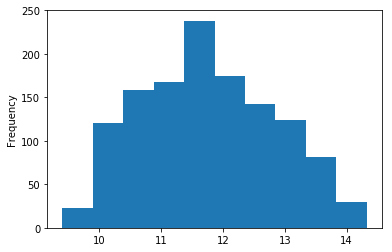

In [7]:
%matplotlib inline
f.open.plot.hist()

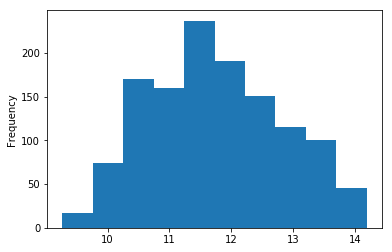

In [8]:
f.close.plot.hist()

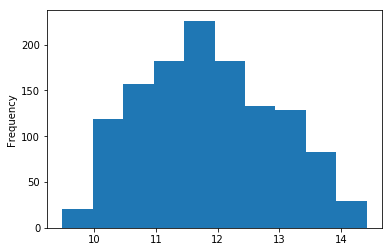

In [9]:
f.high.plot.hist()

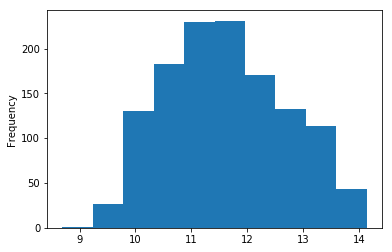

In [10]:
f.low.plot.hist()

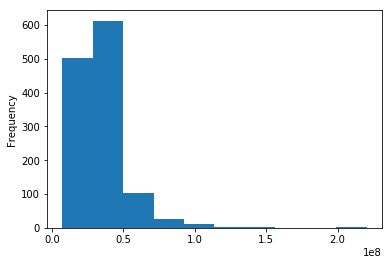

In [11]:
f.volume.plot.hist()

In [14]:
timestep = 7
X_normalized = [normalized_df[(index-timestep+1):index].values for index,row in normalized_df[(timestep-1):].iterrows()]
X = [f[(index-timestep+1):index].values for index,row in f[(timestep-1):].iterrows()]
Y = f[timestep-1:].values # not normaliuzed y for comparision with actual values

In [15]:
f[timestep-1:]

,open,high,low,close,volume
6,13.5073,13.5851,13.4684,13.5773,23154889
7,13.5151,13.8343,13.4995,13.7214,45118246
8,13.8187,13.8343,13.6318,13.7486,30735416
9,13.7876,13.7876,13.4684,13.5384,47932603
10,13.4450,13.5073,13.2192,13.3905,42733755
11,13.4139,13.5462,13.2971,13.4372,33519439
12,13.4294,13.5462,13.3594,13.3827,31631410
13,13.4372,13.5306,13.3282,13.4450,32322032
14,13.3672,13.3905,13.2348,13.2737,33993002
15,13.0557,13.2426,12.9935,13.1336,36489432


In [19]:
#f.drop(columns='date',inplace=True)
normalized_df=(f-f.min())/(f.max()-f.min())

In [20]:
X[-1]

array([[1.0010000e+01, 1.0020000e+01, 9.9000000e+00, 9.9700000e+00,
        3.7336431e+07],
       [9.8700000e+00, 9.9150000e+00, 9.6700000e+00, 9.7000000e+00,
        4.8539347e+07],
       [9.6400000e+00, 9.6800000e+00, 9.4000000e+00, 9.4800000e+00,
        7.6424884e+07],
       [9.5300000e+00, 9.5800000e+00, 9.3600000e+00, 9.4700000e+00,
        5.4111109e+07],
       [9.4700000e+00, 9.5500000e+00, 9.3200000e+00, 9.4900000e+00,
        4.4561879e+07],
       [9.4800000e+00, 9.5500000e+00, 9.4000000e+00, 9.4300000e+00,
        2.9519107e+07]])

In [21]:
Y

array([[1.3507300e+01, 1.3585100e+01, 1.3468400e+01, 1.3577300e+01,
        2.3154889e+07],
       [1.3515100e+01, 1.3834300e+01, 1.3499500e+01, 1.3721400e+01,
        4.5118246e+07],
       [1.3818700e+01, 1.3834300e+01, 1.3631800e+01, 1.3748600e+01,
        3.0735416e+07],
       ...,
       [9.4700000e+00, 9.5500000e+00, 9.3200000e+00, 9.4900000e+00,
        4.4561879e+07],
       [9.4800000e+00, 9.5500000e+00, 9.4000000e+00, 9.4300000e+00,
        2.9519107e+07],
       [9.4100000e+00, 9.4900000e+00, 9.2500000e+00, 9.2700000e+00,
        5.1229915e+07]])

In [22]:
X_withoutDate =X #list(map(lambda x:list(map(lambda item:item[1:],x)),X))
y = list(map(lambda x:x[1],Y))
y # keep only the high

[13.5851,
 13.8343,
 13.8343,
 13.7876,
 13.5073,
 13.5462,
 13.5462,
 13.5306,
 13.3905,
 13.2426,
 13.4995,
 13.4061,
 13.3672,
 13.3438,
 13.1959,
 13.118,
 13.0324,
 13.2348,
 13.3282,
 13.4294,
 13.3983,
 13.4606,
 13.6163,
 13.663,
 13.7019,
 13.7642,
 13.7876,
 14.0289,
 13.8965,
 13.7953,
 13.7175,
 13.8115,
 13.5688,
 13.4983,
 13.3182,
 13.42,
 13.467,
 13.2478,
 13.2086,
 13.42,
 13.1929,
 13.3887,
 13.467,
 13.4279,
 13.4513,
 13.3339,
 13.373,
 13.4278,
 13.42,
 13.42,
 13.3495,
 13.3809,
 13.4513,
 13.467,
 13.467,
 13.1225,
 13.2008,
 13.2712,
 13.146,
 13.0677,
 13.005,
 12.8876,
 13.146,
 13.2634,
 13.3026,
 12.5274,
 12.1359,
 12.1359,
 12.1359,
 11.9245,
 12.0107,
 12.0185,
 12.0733,
 12.0811,
 12.0968,
 12.2456,
 12.3395,
 12.3239,
 12.3004,
 12.5431,
 12.6136,
 12.9424,
 12.8641,
 13.099,
 13.1225,
 13.1381,
 13.0598,
 13.0129,
 12.9424,
 12.6918,
 12.457,
 12.5353,
 12.2569,
 12.1938,
 11.9175,
 11.8386,
 11.7834,
 11.7834,
 11.7202,
 11.9412,
 11.886,
 11.8465,
 

In [23]:
X_withoutDate

[array([[1.3320400e+01, 1.3554000e+01, 1.3312700e+01, 1.3476100e+01,
         3.8467666e+07],
        [1.3616300e+01, 1.3764200e+01, 1.3522900e+01, 1.3663000e+01,
         4.5821291e+07],
        [1.3624100e+01, 1.3686300e+01, 1.3538400e+01, 1.3655200e+01,
         3.2883634e+07],
        [1.3663000e+01, 1.3670800e+01, 1.3476100e+01, 1.3538400e+01,
         2.6827826e+07],
        [1.3585100e+01, 1.3614400e+01, 1.3452800e+01, 1.3507300e+01,
         2.1573764e+07],
        [1.3647400e+01, 1.3694100e+01, 1.3468400e+01, 1.3507300e+01,
         2.7058546e+07]]),
 array([[1.3616300e+01, 1.3764200e+01, 1.3522900e+01, 1.3663000e+01,
         4.5821291e+07],
        [1.3624100e+01, 1.3686300e+01, 1.3538400e+01, 1.3655200e+01,
         3.2883634e+07],
        [1.3663000e+01, 1.3670800e+01, 1.3476100e+01, 1.3538400e+01,
         2.6827826e+07],
        [1.3585100e+01, 1.3614400e+01, 1.3452800e+01, 1.3507300e+01,
         2.1573764e+07],
        [1.3647400e+01, 1.3694100e+01, 1.3468400e+01, 1.35

In [24]:
numpyY = np.array(y)
numpyX = np.array(X_withoutDate)

In [46]:
from keras import Sequential
from keras.layers import LSTM,Activation,Dropout,Dense, CuDNNLSTM

model = Sequential()
model.add(CuDNNLSTM(256,input_shape=(timestep-1,5),return_sequences=True))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(128,return_sequences=True))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam",metrics=['mae', 'acc'])
model.fit(numpyX, numpyY,epochs=100,validation_split=0.02)


Train on 1228 samples, validate on 26 samples
Epoch 1/100
1228/1228 [==============================] - 3s 2ms/step - loss: 98.3928 - mean_absolute_error: 9.7490 - acc: 0.0000e+00 - val_loss: 22.5201 - val_mean_absolute_error: 4.7409 - val_acc: 0.0000e+00
Epoch 2/100
1228/1228 [==============================] - 1s 707us/step - loss: 22.3070 - mean_absolute_error: 4.3866 - acc: 0.0000e+00 - val_loss: 0.0530 - val_mean_absolute_error: 0.1995 - val_acc: 0.0000e+00
Epoch 3/100
1228/1228 [==============================] - 1s 709us/step - loss: 1.9104 - mean_absolute_error: 1.0949 - acc: 0.0000e+00 - val_loss: 4.7448 - val_mean_absolute_error: 2.1680 - val_acc: 0.0000e+00
Epoch 4/100
1228/1228 [==============================] - 1s 715us/step - loss: 1.0664 - mean_absolute_error: 0.8630 - acc: 0.0000e+00 - val_loss: 4.4214 - val_mean_absolute_error: 2.0921 - val_acc: 0.0000e+00
Epoch 5/100
1228/1228 [==============================] - 1s 732us/step - loss: 1.0597 - mean_absolute_error: 0.8552 -

KeyboardInterrupt: 

In [123]:
#testing different optimizer
#with normalized input
from keras import Sequential
from keras.layers import LSTM,Activation,Dropout,Dense

model = Sequential()
model.add(LSTM(128,input_shape=(timestep-1,5),activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(LSTM(1,activation='relu'))
model.compile(loss="mean_squared_error", optimizer="Adadelta",metrics=['mae', 'acc'])
model.fit(numpyX, numpyY,batch_size=1024,epochs=1000,validation_split=0.02)

Train on 1228 samples, validate on 26 samples
Epoch 1/1000
1228/1228 [==============================] - 3s 3ms/step - loss: 142.3932 - mean_absolute_error: 11.8885 - acc: 0.0000e+00 - val_loss: 97.7569 - val_mean_absolute_error: 9.8853 - val_acc: 0.0000e+00
Epoch 2/1000
1228/1228 [==============================] - 0s 183us/step - loss: 141.8678 - mean_absolute_error: 11.8669 - acc: 0.0000e+00 - val_loss: 97.4673 - val_mean_absolute_error: 9.8707 - val_acc: 0.0000e+00
Epoch 3/1000
1228/1228 [==============================] - 0s 180us/step - loss: 141.1207 - mean_absolute_error: 11.8361 - acc: 0.0000e+00 - val_loss: 96.9086 - val_mean_absolute_error: 9.8424 - val_acc: 0.0000e+00
Epoch 4/1000
1228/1228 [==============================] - 0s 181us/step - loss: 139.5170 - mean_absolute_error: 11.7698 - acc: 0.0000e+00 - val_loss: 95.3998 - val_mean_absolute_error: 9.7655 - val_acc: 0.0000e+00
Epoch 5/1000
1228/1228 [==============================] - 0s 180us/step - loss: 133.4537 - mean_abso

Epoch 78/1000
1228/1228 [==============================] - 0s 186us/step - loss: 0.5987 - mean_absolute_error: 0.6412 - acc: 0.0000e+00 - val_loss: 0.8629 - val_mean_absolute_error: 0.7888 - val_acc: 0.0000e+00
Epoch 79/1000
1228/1228 [==============================] - 0s 170us/step - loss: 0.6568 - mean_absolute_error: 0.6939 - acc: 0.0000e+00 - val_loss: 1.0076 - val_mean_absolute_error: 0.8470 - val_acc: 0.0000e+00
Epoch 80/1000
1228/1228 [==============================] - 0s 178us/step - loss: 0.8346 - mean_absolute_error: 0.7986 - acc: 0.0000e+00 - val_loss: 1.2412 - val_mean_absolute_error: 0.9321 - val_acc: 0.0000e+00
Epoch 81/1000
1228/1228 [==============================] - 0s 169us/step - loss: 1.0696 - mean_absolute_error: 0.9208 - acc: 0.0000e+00 - val_loss: 1.3164 - val_mean_absolute_error: 0.9655 - val_acc: 0.0000e+00
Epoch 82/1000
1228/1228 [==============================] - 0s 166us/step - loss: 1.1655 - mean_absolute_error: 0.9684 - acc: 0.0000e+00 - val_loss: 1.1645 -

Epoch 117/1000
1228/1228 [==============================] - 0s 193us/step - loss: 0.9681 - mean_absolute_error: 0.8793 - acc: 0.0000e+00 - val_loss: 0.9349 - val_mean_absolute_error: 0.8024 - val_acc: 0.0000e+00
Epoch 118/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.9595 - mean_absolute_error: 0.8723 - acc: 0.0000e+00 - val_loss: 0.9726 - val_mean_absolute_error: 0.8212 - val_acc: 0.0000e+00
Epoch 119/1000
1228/1228 [==============================] - 0s 214us/step - loss: 0.9924 - mean_absolute_error: 0.8927 - acc: 0.0000e+00 - val_loss: 0.9337 - val_mean_absolute_error: 0.8019 - val_acc: 0.0000e+00
Epoch 120/1000
1228/1228 [==============================] - 0s 287us/step - loss: 1.0332 - mean_absolute_error: 0.9141 - acc: 0.0000e+00 - val_loss: 0.9831 - val_mean_absolute_error: 0.8277 - val_acc: 0.0000e+00
Epoch 121/1000
1228/1228 [==============================] - 0s 256us/step - loss: 0.9792 - mean_absolute_error: 0.8809 - acc: 0.0000e+00 - val_loss: 0.9

Epoch 156/1000
1228/1228 [==============================] - 0s 205us/step - loss: 0.7939 - mean_absolute_error: 0.7892 - acc: 0.0000e+00 - val_loss: 0.5652 - val_mean_absolute_error: 0.6085 - val_acc: 0.0000e+00
Epoch 157/1000
1228/1228 [==============================] - 0s 166us/step - loss: 0.7606 - mean_absolute_error: 0.7679 - acc: 0.0000e+00 - val_loss: 0.4422 - val_mean_absolute_error: 0.5387 - val_acc: 0.0000e+00
Epoch 158/1000
1228/1228 [==============================] - 0s 199us/step - loss: 0.5932 - mean_absolute_error: 0.6710 - acc: 0.0000e+00 - val_loss: 0.4481 - val_mean_absolute_error: 0.5430 - val_acc: 0.0000e+00
Epoch 159/1000
1228/1228 [==============================] - 0s 306us/step - loss: 0.5735 - mean_absolute_error: 0.6599 - acc: 0.0000e+00 - val_loss: 0.3992 - val_mean_absolute_error: 0.5107 - val_acc: 0.0000e+00
Epoch 160/1000
1228/1228 [==============================] - 0s 234us/step - loss: 0.5583 - mean_absolute_error: 0.6464 - acc: 0.0000e+00 - val_loss: 0.4

Epoch 195/1000
1228/1228 [==============================] - 0s 219us/step - loss: 0.3951 - mean_absolute_error: 0.5358 - acc: 0.0000e+00 - val_loss: 0.1933 - val_mean_absolute_error: 0.3638 - val_acc: 0.0000e+00
Epoch 196/1000
1228/1228 [==============================] - 0s 231us/step - loss: 0.4221 - mean_absolute_error: 0.5566 - acc: 0.0000e+00 - val_loss: 0.1798 - val_mean_absolute_error: 0.3532 - val_acc: 0.0000e+00
Epoch 197/1000
1228/1228 [==============================] - 0s 259us/step - loss: 0.3981 - mean_absolute_error: 0.5348 - acc: 0.0000e+00 - val_loss: 0.1696 - val_mean_absolute_error: 0.3432 - val_acc: 0.0000e+00
Epoch 198/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.4166 - mean_absolute_error: 0.5459 - acc: 0.0000e+00 - val_loss: 0.2396 - val_mean_absolute_error: 0.3978 - val_acc: 0.0000e+00
Epoch 199/1000
1228/1228 [==============================] - 0s 241us/step - loss: 0.5578 - mean_absolute_error: 0.6535 - acc: 0.0000e+00 - val_loss: 0.2

Epoch 234/1000
1228/1228 [==============================] - 0s 223us/step - loss: 0.5941 - mean_absolute_error: 0.6821 - acc: 0.0000e+00 - val_loss: 0.2392 - val_mean_absolute_error: 0.4024 - val_acc: 0.0000e+00
Epoch 235/1000
1228/1228 [==============================] - 0s 172us/step - loss: 0.5611 - mean_absolute_error: 0.6631 - acc: 0.0000e+00 - val_loss: 0.1903 - val_mean_absolute_error: 0.3543 - val_acc: 0.0000e+00
Epoch 236/1000
1228/1228 [==============================] - 0s 272us/step - loss: 0.4959 - mean_absolute_error: 0.6134 - acc: 0.0000e+00 - val_loss: 0.1641 - val_mean_absolute_error: 0.3331 - val_acc: 0.0000e+00
Epoch 237/1000
1228/1228 [==============================] - 0s 173us/step - loss: 0.4327 - mean_absolute_error: 0.5649 - acc: 0.0000e+00 - val_loss: 0.1304 - val_mean_absolute_error: 0.3025 - val_acc: 0.0000e+00
Epoch 238/1000
1228/1228 [==============================] - 0s 272us/step - loss: 0.3688 - mean_absolute_error: 0.5132 - acc: 0.0000e+00 - val_loss: 0.1

Epoch 273/1000
1228/1228 [==============================] - 0s 235us/step - loss: 0.4885 - mean_absolute_error: 0.6170 - acc: 0.0000e+00 - val_loss: 0.1504 - val_mean_absolute_error: 0.3143 - val_acc: 0.0000e+00
Epoch 274/1000
1228/1228 [==============================] - 0s 194us/step - loss: 0.4818 - mean_absolute_error: 0.6113 - acc: 0.0000e+00 - val_loss: 0.1573 - val_mean_absolute_error: 0.3227 - val_acc: 0.0000e+00
Epoch 275/1000
1228/1228 [==============================] - 0s 246us/step - loss: 0.4588 - mean_absolute_error: 0.5937 - acc: 0.0000e+00 - val_loss: 0.1375 - val_mean_absolute_error: 0.2977 - val_acc: 0.0000e+00
Epoch 276/1000
1228/1228 [==============================] - 0s 171us/step - loss: 0.4352 - mean_absolute_error: 0.5722 - acc: 0.0000e+00 - val_loss: 0.1543 - val_mean_absolute_error: 0.3181 - val_acc: 0.0000e+00
Epoch 277/1000
1228/1228 [==============================] - 0s 260us/step - loss: 0.4888 - mean_absolute_error: 0.6143 - acc: 0.0000e+00 - val_loss: 0.2

Epoch 312/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.4770 - mean_absolute_error: 0.6136 - acc: 0.0000e+00 - val_loss: 0.1463 - val_mean_absolute_error: 0.3207 - val_acc: 0.0000e+00
Epoch 313/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.5139 - mean_absolute_error: 0.6367 - acc: 0.0000e+00 - val_loss: 0.1079 - val_mean_absolute_error: 0.2671 - val_acc: 0.0000e+00
Epoch 314/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.4272 - mean_absolute_error: 0.5752 - acc: 0.0000e+00 - val_loss: 0.1372 - val_mean_absolute_error: 0.3096 - val_acc: 0.0000e+00
Epoch 315/1000
1228/1228 [==============================] - 0s 219us/step - loss: 0.5253 - mean_absolute_error: 0.6423 - acc: 0.0000e+00 - val_loss: 0.1190 - val_mean_absolute_error: 0.2877 - val_acc: 0.0000e+00
Epoch 316/1000
1228/1228 [==============================] - 0s 191us/step - loss: 0.4785 - mean_absolute_error: 0.6106 - acc: 0.0000e+00 - val_loss: 0.1

Epoch 351/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2592 - mean_absolute_error: 0.4262 - acc: 0.0000e+00 - val_loss: 0.0634 - val_mean_absolute_error: 0.2055 - val_acc: 0.0000e+00
Epoch 352/1000
1228/1228 [==============================] - 0s 247us/step - loss: 0.3214 - mean_absolute_error: 0.4875 - acc: 0.0000e+00 - val_loss: 0.0952 - val_mean_absolute_error: 0.2587 - val_acc: 0.0000e+00
Epoch 353/1000
1228/1228 [==============================] - 0s 200us/step - loss: 0.3921 - mean_absolute_error: 0.5509 - acc: 0.0000e+00 - val_loss: 0.1084 - val_mean_absolute_error: 0.2789 - val_acc: 0.0000e+00
Epoch 354/1000
1228/1228 [==============================] - 0s 222us/step - loss: 0.4406 - mean_absolute_error: 0.5839 - acc: 0.0000e+00 - val_loss: 0.0917 - val_mean_absolute_error: 0.2526 - val_acc: 0.0000e+00
Epoch 355/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.4097 - mean_absolute_error: 0.5574 - acc: 0.0000e+00 - val_loss: 0.1

Epoch 390/1000
1228/1228 [==============================] - 0s 186us/step - loss: 0.2801 - mean_absolute_error: 0.4486 - acc: 0.0000e+00 - val_loss: 0.0509 - val_mean_absolute_error: 0.1869 - val_acc: 0.0000e+00
Epoch 391/1000
1228/1228 [==============================] - 0s 255us/step - loss: 0.2785 - mean_absolute_error: 0.4498 - acc: 0.0000e+00 - val_loss: 0.0544 - val_mean_absolute_error: 0.1948 - val_acc: 0.0000e+00
Epoch 392/1000
1228/1228 [==============================] - 0s 171us/step - loss: 0.2942 - mean_absolute_error: 0.4684 - acc: 0.0000e+00 - val_loss: 0.0782 - val_mean_absolute_error: 0.2378 - val_acc: 0.0000e+00
Epoch 393/1000
1228/1228 [==============================] - 0s 170us/step - loss: 0.3708 - mean_absolute_error: 0.5350 - acc: 0.0000e+00 - val_loss: 0.0827 - val_mean_absolute_error: 0.2443 - val_acc: 0.0000e+00
Epoch 394/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.3947 - mean_absolute_error: 0.5553 - acc: 0.0000e+00 - val_loss: 0.1

Epoch 429/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.4429 - mean_absolute_error: 0.5933 - acc: 0.0000e+00 - val_loss: 0.0593 - val_mean_absolute_error: 0.2056 - val_acc: 0.0000e+00
Epoch 430/1000
1228/1228 [==============================] - 0s 225us/step - loss: 0.4075 - mean_absolute_error: 0.5612 - acc: 0.0000e+00 - val_loss: 0.0720 - val_mean_absolute_error: 0.2318 - val_acc: 0.0000e+00
Epoch 431/1000
1228/1228 [==============================] - 0s 298us/step - loss: 0.4160 - mean_absolute_error: 0.5739 - acc: 0.0000e+00 - val_loss: 0.0729 - val_mean_absolute_error: 0.2329 - val_acc: 0.0000e+00
Epoch 432/1000
1228/1228 [==============================] - 0s 170us/step - loss: 0.4154 - mean_absolute_error: 0.5717 - acc: 0.0000e+00 - val_loss: 0.0443 - val_mean_absolute_error: 0.1762 - val_acc: 0.0000e+00
Epoch 433/1000
1228/1228 [==============================] - 0s 179us/step - loss: 0.3136 - mean_absolute_error: 0.4774 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 468/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2843 - mean_absolute_error: 0.4579 - acc: 0.0000e+00 - val_loss: 0.0419 - val_mean_absolute_error: 0.1729 - val_acc: 0.0000e+00
Epoch 469/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2890 - mean_absolute_error: 0.4645 - acc: 0.0000e+00 - val_loss: 0.0531 - val_mean_absolute_error: 0.1966 - val_acc: 0.0000e+00
Epoch 470/1000
1228/1228 [==============================] - 0s 178us/step - loss: 0.3188 - mean_absolute_error: 0.4943 - acc: 0.0000e+00 - val_loss: 0.0640 - val_mean_absolute_error: 0.2194 - val_acc: 0.0000e+00
Epoch 471/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.3657 - mean_absolute_error: 0.5360 - acc: 0.0000e+00 - val_loss: 0.0676 - val_mean_absolute_error: 0.2270 - val_acc: 0.0000e+00
Epoch 472/1000
1228/1228 [==============================] - 0s 177us/step - loss: 0.3896 - mean_absolute_error: 0.5565 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 507/1000
1228/1228 [==============================] - 0s 195us/step - loss: 0.3744 - mean_absolute_error: 0.5449 - acc: 0.0000e+00 - val_loss: 0.0926 - val_mean_absolute_error: 0.2687 - val_acc: 0.0000e+00
Epoch 508/1000
1228/1228 [==============================] - 0s 254us/step - loss: 0.4115 - mean_absolute_error: 0.5803 - acc: 0.0000e+00 - val_loss: 0.0826 - val_mean_absolute_error: 0.2535 - val_acc: 0.0000e+00
Epoch 509/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.4182 - mean_absolute_error: 0.5796 - acc: 0.0000e+00 - val_loss: 0.0544 - val_mean_absolute_error: 0.2023 - val_acc: 0.0000e+00
Epoch 510/1000
1228/1228 [==============================] - 0s 261us/step - loss: 0.3189 - mean_absolute_error: 0.4958 - acc: 0.0000e+00 - val_loss: 0.0450 - val_mean_absolute_error: 0.1819 - val_acc: 0.0000e+00
Epoch 511/1000
1228/1228 [==============================] - 0s 192us/step - loss: 0.3142 - mean_absolute_error: 0.4879 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 546/1000
1228/1228 [==============================] - 0s 170us/step - loss: 0.2968 - mean_absolute_error: 0.4738 - acc: 0.0000e+00 - val_loss: 0.0514 - val_mean_absolute_error: 0.1973 - val_acc: 0.0000e+00
Epoch 547/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2876 - mean_absolute_error: 0.4684 - acc: 0.0000e+00 - val_loss: 0.0439 - val_mean_absolute_error: 0.1804 - val_acc: 0.0000e+00
Epoch 548/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2970 - mean_absolute_error: 0.4750 - acc: 0.0000e+00 - val_loss: 0.0367 - val_mean_absolute_error: 0.1656 - val_acc: 0.0000e+00
Epoch 549/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2399 - mean_absolute_error: 0.4226 - acc: 0.0000e+00 - val_loss: 0.0330 - val_mean_absolute_error: 0.1562 - val_acc: 0.0000e+00
Epoch 550/1000
1228/1228 [==============================] - 0s 166us/step - loss: 0.2181 - mean_absolute_error: 0.3969 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 585/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2692 - mean_absolute_error: 0.4513 - acc: 0.0000e+00 - val_loss: 0.0504 - val_mean_absolute_error: 0.1952 - val_acc: 0.0000e+00
Epoch 586/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2577 - mean_absolute_error: 0.4458 - acc: 0.0000e+00 - val_loss: 0.0437 - val_mean_absolute_error: 0.1810 - val_acc: 0.0000e+00
Epoch 587/1000
1228/1228 [==============================] - 0s 167us/step - loss: 0.2696 - mean_absolute_error: 0.4510 - acc: 0.0000e+00 - val_loss: 0.0487 - val_mean_absolute_error: 0.1919 - val_acc: 0.0000e+00
Epoch 588/1000
1228/1228 [==============================] - 0s 179us/step - loss: 0.2618 - mean_absolute_error: 0.4455 - acc: 0.0000e+00 - val_loss: 0.0371 - val_mean_absolute_error: 0.1667 - val_acc: 0.0000e+00
Epoch 589/1000
1228/1228 [==============================] - 0s 167us/step - loss: 0.2403 - mean_absolute_error: 0.4226 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 624/1000
1228/1228 [==============================] - 0s 177us/step - loss: 0.3480 - mean_absolute_error: 0.5293 - acc: 0.0000e+00 - val_loss: 0.0449 - val_mean_absolute_error: 0.1840 - val_acc: 0.0000e+00
Epoch 625/1000
1228/1228 [==============================] - 0s 176us/step - loss: 0.3095 - mean_absolute_error: 0.4929 - acc: 0.0000e+00 - val_loss: 0.0625 - val_mean_absolute_error: 0.2184 - val_acc: 0.0000e+00
Epoch 626/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.3567 - mean_absolute_error: 0.5365 - acc: 0.0000e+00 - val_loss: 0.0660 - val_mean_absolute_error: 0.2246 - val_acc: 0.0000e+00
Epoch 627/1000
1228/1228 [==============================] - 0s 165us/step - loss: 0.3527 - mean_absolute_error: 0.5362 - acc: 0.0000e+00 - val_loss: 0.0571 - val_mean_absolute_error: 0.2088 - val_acc: 0.0000e+00
Epoch 628/1000
1228/1228 [==============================] - 0s 177us/step - loss: 0.3311 - mean_absolute_error: 0.5141 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 663/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2883 - mean_absolute_error: 0.4754 - acc: 0.0000e+00 - val_loss: 0.0424 - val_mean_absolute_error: 0.1784 - val_acc: 0.0000e+00
Epoch 664/1000
1228/1228 [==============================] - 0s 179us/step - loss: 0.2558 - mean_absolute_error: 0.4383 - acc: 0.0000e+00 - val_loss: 0.0668 - val_mean_absolute_error: 0.2248 - val_acc: 0.0000e+00
Epoch 665/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.3365 - mean_absolute_error: 0.5249 - acc: 0.0000e+00 - val_loss: 0.0742 - val_mean_absolute_error: 0.2380 - val_acc: 0.0000e+00
Epoch 666/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.3687 - mean_absolute_error: 0.5496 - acc: 0.0000e+00 - val_loss: 0.0598 - val_mean_absolute_error: 0.2126 - val_acc: 0.0000e+00
Epoch 667/1000
1228/1228 [==============================] - 0s 178us/step - loss: 0.3187 - mean_absolute_error: 0.5048 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 702/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.3116 - mean_absolute_error: 0.4990 - acc: 0.0000e+00 - val_loss: 0.0546 - val_mean_absolute_error: 0.2031 - val_acc: 0.0000e+00
Epoch 703/1000
1228/1228 [==============================] - 0s 170us/step - loss: 0.3103 - mean_absolute_error: 0.5024 - acc: 0.0000e+00 - val_loss: 0.0473 - val_mean_absolute_error: 0.1884 - val_acc: 0.0000e+00
Epoch 704/1000
1228/1228 [==============================] - 0s 166us/step - loss: 0.2902 - mean_absolute_error: 0.4791 - acc: 0.0000e+00 - val_loss: 0.0330 - val_mean_absolute_error: 0.1559 - val_acc: 0.0000e+00
Epoch 705/1000
1228/1228 [==============================] - 0s 177us/step - loss: 0.2488 - mean_absolute_error: 0.4378 - acc: 0.0000e+00 - val_loss: 0.0303 - val_mean_absolute_error: 0.1488 - val_acc: 0.0000e+00
Epoch 706/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2306 - mean_absolute_error: 0.4163 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 741/1000
1228/1228 [==============================] - 0s 177us/step - loss: 0.2388 - mean_absolute_error: 0.4316 - acc: 0.0000e+00 - val_loss: 0.0287 - val_mean_absolute_error: 0.1438 - val_acc: 0.0000e+00
Epoch 742/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2157 - mean_absolute_error: 0.4004 - acc: 0.0000e+00 - val_loss: 0.0350 - val_mean_absolute_error: 0.1606 - val_acc: 0.0000e+00
Epoch 743/1000
1228/1228 [==============================] - 0s 207us/step - loss: 0.2474 - mean_absolute_error: 0.4371 - acc: 0.0000e+00 - val_loss: 0.0320 - val_mean_absolute_error: 0.1532 - val_acc: 0.0000e+00
Epoch 744/1000
1228/1228 [==============================] - 0s 209us/step - loss: 0.2413 - mean_absolute_error: 0.4320 - acc: 0.0000e+00 - val_loss: 0.0433 - val_mean_absolute_error: 0.1789 - val_acc: 0.0000e+00
Epoch 745/1000
1228/1228 [==============================] - 0s 203us/step - loss: 0.2738 - mean_absolute_error: 0.4689 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 780/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.1890 - mean_absolute_error: 0.3721 - acc: 0.0000e+00 - val_loss: 0.0269 - val_mean_absolute_error: 0.1391 - val_acc: 0.0000e+00
Epoch 781/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2222 - mean_absolute_error: 0.4108 - acc: 0.0000e+00 - val_loss: 0.0283 - val_mean_absolute_error: 0.1426 - val_acc: 0.0000e+00
Epoch 782/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2379 - mean_absolute_error: 0.4299 - acc: 0.0000e+00 - val_loss: 0.0353 - val_mean_absolute_error: 0.1607 - val_acc: 0.0000e+00
Epoch 783/1000
1228/1228 [==============================] - 0s 176us/step - loss: 0.2578 - mean_absolute_error: 0.4519 - acc: 0.0000e+00 - val_loss: 0.0355 - val_mean_absolute_error: 0.1608 - val_acc: 0.0000e+00
Epoch 784/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2887 - mean_absolute_error: 0.4776 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 819/1000
1228/1228 [==============================] - 0s 167us/step - loss: 0.2313 - mean_absolute_error: 0.4214 - acc: 0.0000e+00 - val_loss: 0.0217 - val_mean_absolute_error: 0.1273 - val_acc: 0.0000e+00
Epoch 820/1000
1228/1228 [==============================] - 0s 177us/step - loss: 0.2043 - mean_absolute_error: 0.3908 - acc: 0.0000e+00 - val_loss: 0.0195 - val_mean_absolute_error: 0.1211 - val_acc: 0.0000e+00
Epoch 821/1000
1228/1228 [==============================] - 0s 167us/step - loss: 0.1948 - mean_absolute_error: 0.3813 - acc: 0.0000e+00 - val_loss: 0.0214 - val_mean_absolute_error: 0.1269 - val_acc: 0.0000e+00
Epoch 822/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2147 - mean_absolute_error: 0.4035 - acc: 0.0000e+00 - val_loss: 0.0224 - val_mean_absolute_error: 0.1288 - val_acc: 0.0000e+00
Epoch 823/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.2077 - mean_absolute_error: 0.3976 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 858/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2241 - mean_absolute_error: 0.4154 - acc: 0.0000e+00 - val_loss: 0.0316 - val_mean_absolute_error: 0.1511 - val_acc: 0.0000e+00
Epoch 859/1000
1228/1228 [==============================] - 0s 167us/step - loss: 0.2218 - mean_absolute_error: 0.4184 - acc: 0.0000e+00 - val_loss: 0.0347 - val_mean_absolute_error: 0.1589 - val_acc: 0.0000e+00
Epoch 860/1000
1228/1228 [==============================] - 0s 229us/step - loss: 0.2363 - mean_absolute_error: 0.4309 - acc: 0.0000e+00 - val_loss: 0.0321 - val_mean_absolute_error: 0.1522 - val_acc: 0.0000e+00
Epoch 861/1000
1228/1228 [==============================] - 0s 225us/step - loss: 0.2486 - mean_absolute_error: 0.4422 - acc: 0.0000e+00 - val_loss: 0.0287 - val_mean_absolute_error: 0.1438 - val_acc: 0.0000e+00
Epoch 862/1000
1228/1228 [==============================] - 0s 164us/step - loss: 0.2229 - mean_absolute_error: 0.4137 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 897/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.1608 - mean_absolute_error: 0.3455 - acc: 0.0000e+00 - val_loss: 0.0221 - val_mean_absolute_error: 0.1270 - val_acc: 0.0000e+00
Epoch 898/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.1849 - mean_absolute_error: 0.3745 - acc: 0.0000e+00 - val_loss: 0.0275 - val_mean_absolute_error: 0.1408 - val_acc: 0.0000e+00
Epoch 899/1000
1228/1228 [==============================] - 0s 176us/step - loss: 0.2387 - mean_absolute_error: 0.4374 - acc: 0.0000e+00 - val_loss: 0.0338 - val_mean_absolute_error: 0.1554 - val_acc: 0.0000e+00
Epoch 900/1000
1228/1228 [==============================] - 0s 167us/step - loss: 0.2406 - mean_absolute_error: 0.4412 - acc: 0.0000e+00 - val_loss: 0.0360 - val_mean_absolute_error: 0.1611 - val_acc: 0.0000e+00
Epoch 901/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.2402 - mean_absolute_error: 0.4340 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 936/1000
1228/1228 [==============================] - 0s 186us/step - loss: 0.2083 - mean_absolute_error: 0.4031 - acc: 0.0000e+00 - val_loss: 0.0202 - val_mean_absolute_error: 0.1217 - val_acc: 0.0000e+00
Epoch 937/1000
1228/1228 [==============================] - 0s 165us/step - loss: 0.1834 - mean_absolute_error: 0.3733 - acc: 0.0000e+00 - val_loss: 0.0174 - val_mean_absolute_error: 0.1145 - val_acc: 0.0000e+00
Epoch 938/1000
1228/1228 [==============================] - 0s 187us/step - loss: 0.1727 - mean_absolute_error: 0.3587 - acc: 0.0000e+00 - val_loss: 0.0171 - val_mean_absolute_error: 0.1140 - val_acc: 0.0000e+00
Epoch 939/1000
1228/1228 [==============================] - 0s 167us/step - loss: 0.1878 - mean_absolute_error: 0.3742 - acc: 0.0000e+00 - val_loss: 0.0187 - val_mean_absolute_error: 0.1180 - val_acc: 0.0000e+00
Epoch 940/1000
1228/1228 [==============================] - 0s 179us/step - loss: 0.1817 - mean_absolute_error: 0.3711 - acc: 0.0000e+00 - val_loss: 0.0

Epoch 975/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.1364 - mean_absolute_error: 0.3120 - acc: 0.0000e+00 - val_loss: 0.0174 - val_mean_absolute_error: 0.1138 - val_acc: 0.0000e+00
Epoch 976/1000
1228/1228 [==============================] - 0s 169us/step - loss: 0.1551 - mean_absolute_error: 0.3420 - acc: 0.0000e+00 - val_loss: 0.0182 - val_mean_absolute_error: 0.1165 - val_acc: 0.0000e+00
Epoch 977/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.1654 - mean_absolute_error: 0.3522 - acc: 0.0000e+00 - val_loss: 0.0223 - val_mean_absolute_error: 0.1276 - val_acc: 0.0000e+00
Epoch 978/1000
1228/1228 [==============================] - 0s 168us/step - loss: 0.1791 - mean_absolute_error: 0.3738 - acc: 0.0000e+00 - val_loss: 0.0200 - val_mean_absolute_error: 0.1208 - val_acc: 0.0000e+00
Epoch 979/1000
1228/1228 [==============================] - 0s 178us/step - loss: 0.1775 - mean_absolute_error: 0.3638 - acc: 0.0000e+00 - val_loss: 0.0

In [124]:
model.predict(numpyX[0:10])

array([[ 12.86147308],
       [ 12.96798325],
       [ 13.03898239],
       [ 13.04905701],
       [ 13.09076691],
       [ 13.11263657],
       [ 13.11837196],
       [ 13.14625072],
       [ 13.10514069],
       [ 12.9647665 ]], dtype=float32)

In [125]:
numpyY[0:10]

array([ 13.6863,  13.6708,  13.6144,  13.6941,  13.5851,  13.8343,
        13.8343,  13.7876,  13.5073,  13.5462])

In [130]:
#testing model with more layers on normalized data
from keras import Sequential
from keras.layers import LSTM,Activation,Dropout,Dense

model2 = Sequential()
model2.add(LSTM(256,input_shape=(timestep-1,5),activation='relu',return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(128,activation='relu',return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(64,activation='relu',return_sequences=True))
model2.add(LSTM(1))
model2.compile(loss="mean_squared_error", optimizer="Adadelta",metrics=['mae'])
model2.fit(numpyX, numpyY,batch_size=256,epochs=100,validation_split=0.02)

Train on 1228 samples, validate on 26 samples
Epoch 1/100
1228/1228 [==============================] - 5s 4ms/step - loss: 141.5151 - mean_absolute_error: 11.8521 - val_loss: 95.6996 - val_mean_absolute_error: 9.7808
Epoch 2/100
1228/1228 [==============================] - 1s 513us/step - loss: 131.6196 - mean_absolute_error: 11.4289 - val_loss: 80.9987 - val_mean_absolute_error: 8.9980
Epoch 3/100
1228/1228 [==============================] - 1s 526us/step - loss: 119.8037 - mean_absolute_error: 10.8974 - val_loss: 79.8868 - val_mean_absolute_error: 8.9360
Epoch 4/100
1228/1228 [==============================] - 1s 530us/step - loss: 119.7559 - mean_absolute_error: 10.8950 - val_loss: 79.5874 - val_mean_absolute_error: 8.9192
Epoch 5/100
1228/1228 [==============================] - 1s 522us/step - loss: 119.7420 - mean_absolute_error: 10.8943 - val_loss: 79.4278 - val_mean_absolute_error: 8.9102
Epoch 6/100
1228/1228 [==============================] - 1s 522us/step - loss: 119.7339 - m

Epoch 48/100
1228/1228 [==============================] - 1s 494us/step - loss: 119.6964 - mean_absolute_error: 10.8921 - val_loss: 79.1664 - val_mean_absolute_error: 8.8954
Epoch 49/100
1228/1228 [==============================] - 1s 496us/step - loss: 119.6963 - mean_absolute_error: 10.8921 - val_loss: 79.1659 - val_mean_absolute_error: 8.8954
Epoch 50/100
1228/1228 [==============================] - 1s 495us/step - loss: 119.6961 - mean_absolute_error: 10.8921 - val_loss: 79.1655 - val_mean_absolute_error: 8.8954
Epoch 51/100
1228/1228 [==============================] - 1s 495us/step - loss: 119.6960 - mean_absolute_error: 10.8921 - val_loss: 79.1651 - val_mean_absolute_error: 8.8954
Epoch 52/100
1228/1228 [==============================] - 1s 494us/step - loss: 119.6959 - mean_absolute_error: 10.8921 - val_loss: 79.1647 - val_mean_absolute_error: 8.8953
Epoch 53/100
1228/1228 [==============================] - 1s 499us/step - loss: 119.6958 - mean_absolute_error: 10.8921 - val_loss

In [131]:
model.predict(numpyX[0:10])

array([[ 12.86147308],
       [ 12.96798325],
       [ 13.03898239],
       [ 13.04905701],
       [ 13.09076691],
       [ 13.11263657],
       [ 13.11837196],
       [ 13.14625072],
       [ 13.10514069],
       [ 12.9647665 ]], dtype=float32)

In [132]:
numpyY[0:10]

array([ 13.6863,  13.6708,  13.6144,  13.6941,  13.5851,  13.8343,
        13.8343,  13.7876,  13.5073,  13.5462])